In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

import msyexp.datasets as ds
import msyexp.ratios as yr
import msyexp.xytools as xytools
import msyexp.plotfuncs as pf
import msyexp.general as general

%matplotlib inline

In [3]:
outdir = '{}/yxratios'.format(ds.paths.NBOUTDIR)
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [4]:
data = ds.get_gtex_data(males_only=True, adjusted=True)
meta = ds.get_metadata()

In [5]:
rbt = yr.calc_ratios_by_tissue(data, meta)
rbt

,Adipose - Subcutaneous,Adipose - Visceral,Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Brain - Amygdala,Brain - Cerebellum,Brain - Cortex,Brain - Hippocampus,...,Prostate,Salivary Gland,Skeletal Muscle,Skin,Small Intestine,Spinal Cord,Spleen,Stomach,Testis,Thyroid
AMELY/AMELX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.837854
DDX3Y/DDX3X,-1.724192,-1.675794,-0.960296,-1.252301,-1.230066,-0.943093,-1.165228,-0.144136,-1.080038,-1.018928,...,-1.139828,-1.337741,-1.798075,-1.810942,-2.129316,-0.987873,-1.553323,-1.659547,-0.425449,-1.255191
EIF1AY/EIF1AX,-0.350779,-0.506011,0.695697,0.081880,0.300575,0.339785,-0.345872,-2.039473,-1.035627,-0.428070,...,0.300887,-0.196254,0.498741,-0.513742,0.381809,-0.095473,1.777936,-0.278306,-0.248111,-0.209904
HSFY/HSFX,-1.395737,NaN,-1.307596,-1.954930,-1.646164,-2.012863,-1.180541,-1.736892,-1.147895,-0.864806,...,-1.409756,-1.524640,-1.517430,-1.174548,NaN,-1.019224,-2.192460,NaN,0.673036,-1.668763
KDM5D/KDM5C,-0.059532,-0.147655,0.726888,0.278436,0.304627,0.165380,-0.032665,-0.506068,-0.433627,-0.213007,...,-0.162879,-0.291455,-1.371133,-0.875967,0.528521,0.018649,0.409595,0.225537,-0.480101,0.157797
NLGN4Y/NLGN4X,1.051062,-0.499092,2.574449,1.974568,1.224785,1.097442,-0.287671,-0.780659,-0.499443,-0.346611,...,1.902515,2.184339,NaN,1.229462,NaN,0.424771,-0.852989,NaN,-1.198493,1.104954
PCDH11Y/PCDH11X,NaN,NaN,NaN,-1.056387,NaN,0.531953,0.795806,NaN,0.538686,1.709153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRKY/PRKX,0.310357,-0.578356,NaN,0.323159,-0.022973,0.064739,-1.248958,0.866970,-0.844352,-1.307832,...,0.037480,-0.435650,0.093415,0.724392,-0.522360,-1.565460,-0.783725,0.278271,-2.539712,-3.157101
RBMY/RBMX,-7.874228,-7.500875,-7.407614,-7.751763,-7.831710,-7.946919,-6.762731,-7.757069,-6.792585,-6.773857,...,-7.512688,-7.832398,-7.557375,-7.512637,-6.497236,-6.582416,-7.895226,-7.383474,-0.433784,-8.200944
RPS4Y1/RPS4X,-1.472102,-1.231026,-0.564456,-1.495145,-1.505888,-1.694777,-1.629073,-1.243770,-1.347275,-1.567765,...,-1.358173,-1.923165,-1.440160,-2.248195,-1.504628,-1.964216,-1.074174,-1.193280,-0.604974,-1.312133


Save table of values

In [6]:
(2**rbt).T.to_csv("{}/yxratios_median_by_tissue.txt".format(outdir), sep='\t')

Calculate Y/X ratios and assess statistical significance

In [7]:
res = yr.yxratio_sig_test(data, meta)

In [8]:
res.head(10)

,pair,tissue,log2(Y/X ratio),Y/X ratio,pval,pval_adj,status
0,AMELY/AMELX,Adipose - Subcutaneous,NaN,NaN,NaN,NaN,NaN
1,DDX3Y/DDX3X,Adipose - Subcutaneous,-1.724192,0.302668,2.836405e-32,2.969750e-31,X > Y
2,EIF1AY/EIF1AX,Adipose - Subcutaneous,-0.350779,0.784161,7.715210e-25,3.900467e-24,X > Y
3,HSFY/HSFX,Adipose - Subcutaneous,-1.395737,0.380050,3.535796e-25,1.804247e-24,X > Y
4,KDM5D/KDM5C,Adipose - Subcutaneous,-0.059532,0.959575,8.442218e-03,8.881409e-03,X > Y
5,NLGN4Y/NLGN4X,Adipose - Subcutaneous,1.051062,2.072054,1.960882e-24,9.733106e-24,Y > X
6,PCDH11Y/PCDH11X,Adipose - Subcutaneous,NaN,NaN,NaN,NaN,NaN
7,PRKY/PRKX,Adipose - Subcutaneous,0.310357,1.240014,4.651137e-19,1.442910e-18,Y > X
8,RBMY/RBMX,Adipose - Subcutaneous,-7.874228,0.004262,2.836405e-32,2.969750e-31,X > Y
9,RPS4Y1/RPS4X,Adipose - Subcutaneous,-1.472102,0.360457,2.836405e-32,2.969750e-31,X > Y


Plot results

In [9]:
# subset to 13 non-testis-specific pairs
_pairs = ['{0}/{1}'.format(y, x) for y, x in zip(xytools.XYPAIRS_Y13, xytools.XYPAIRS_X13)]
res13 = res.loc[res['pair'].isin(_pairs) & res['pval'].notnull()]
print(res13.shape)

(431, 7)


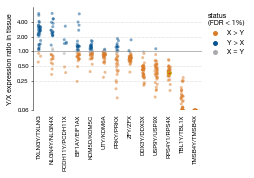

In [10]:
fig, ax = yr.plot_yxratios(res13)
fig.savefig("{}/median_YX_ratios_with_signif.pdf".format(outdir))

Print counts for each of the three categories

In [11]:
res13['status'].value_counts()

X > Y    308
Y > X     98
X = Y     25
Name: status, dtype: int64

Save data with significance for all pairs

In [12]:
_res = res.loc[res.notnull().all(axis=1)]
_res = _res.sort_values(['pair', 'tissue'])
_res.to_csv('{}/median_YX_ratios_with_signif.txt'.format(outdir), sep='\t', index=False)
_res

,pair,tissue,log2(Y/X ratio),Y/X ratio,pval,pval_adj,status
700,AMELY/AMELX,Thyroid,1.837854,3.574780,8.149782e-17,2.213821e-16,Y > X
1,DDX3Y/DDX3X,Adipose - Subcutaneous,-1.724192,0.302668,2.836405e-32,2.969750e-31,X > Y
21,DDX3Y/DDX3X,Adipose - Visceral,-1.675794,0.312994,9.804435e-24,4.498505e-23,X > Y
41,DDX3Y/DDX3X,Adrenal Gland,-0.960296,0.513951,7.577765e-12,1.343331e-11,X > Y
61,DDX3Y/DDX3X,Artery - Aorta,-1.252301,0.419778,6.513351e-23,2.756814e-22,X > Y
...,...,...,...,...,...,...,...
639,ZFY/ZFX,Spinal Cord,-0.466046,0.723946,3.569388e-08,4.673587e-08,X > Y
659,ZFY/ZFX,Spleen,-0.819373,0.566688,3.506051e-11,5.407638e-11,X > Y
679,ZFY/ZFX,Stomach,-0.514329,0.700119,7.577765e-12,1.343331e-11,X > Y
699,ZFY/ZFX,Testis,0.781404,1.718803,5.078179e-19,1.566489e-18,Y > X


### Between-pair vs. between-tissue comparison

To perform Friedman tests, must have (non-null) measurements for all pairs and all tissues. Thus, exclude PCDH11Y/PCDH11X, TBL1Y/TBL1X, and TMSB4Y/TMSB4X from this analysis, and a small number of tissues where some of the remaining pairs were too lowly expressed to reliably calculate the Y/X expression ratio.

At the end, these tests will be performed on 10 pairs across 28 tissues.

In [13]:
rbt = pd.pivot(res13, index='pair', columns='tissue', values='log2(Y/X ratio)')

rbt = rbt.loc[~rbt.index.isin(('PCDH11Y/PCDH11X', 'TBL1Y/TBL1X', 'TMSB4Y/TMSB4X'))]
excl_tissues = list(rbt.columns[rbt.isnull().any(axis=0)])
print("excluding: {}".format(excl_tissues))
rbt = rbt.loc[:, rbt.notnull().all(axis=0)]
print(rbt.shape)
print()

print("differences between pairs")
q, p = ss.friedmanchisquare(*rbt.values)
print("Friedman test, differences between X-Y pairs")
print("Q = {:.1f}".format(q))
print("P = {:.2e}".format(p))

print("\ndifferences between tissues")
q, p = ss.friedmanchisquare(*rbt.T.values)
print("Friedman test, differences between tissues")
print("Q = {:.1f}".format(q))
print("P = {:.2e}".format(p))

excluding: ['Adrenal Gland', 'Colon - Transverse', 'Heart - Left Ventricle', 'Liver', 'Pancreas', 'Skeletal Muscle', 'Small Intestine', 'Stomach']
(10, 28)

differences between pairs
Friedman test, differences between X-Y pairs
Q = 154.6
P = 1.00e-28

differences between tissues
Friedman test, differences between tissues
Q = 27.9
P = 4.15e-01


Plot to make the point visually

(10, 36)


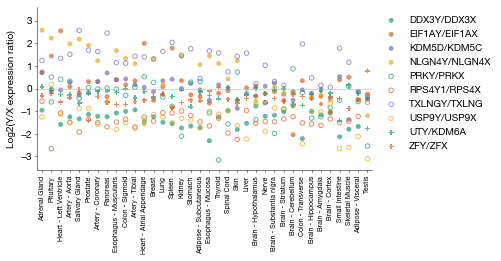

In [14]:
rbt = pd.pivot(res13, index='pair', columns='tissue', values='log2(Y/X ratio)')

rbt = rbt.loc[~rbt.index.isin(('PCDH11Y/PCDH11X', 'TBL1Y/TBL1X', 'TMSB4Y/TMSB4X'))]
print(rbt.shape)

colors = ['#1c9e77', '#d76127', '#7671b3', '#e5ac23']

tmed = rbt.mean(axis=0)
tmed = tmed.sort_values(ascending=False)
rbt = rbt.reindex(tmed.index, axis=1)

xticks = np.arange(rbt.shape[1])
xtlabs = rbt.columns

fig, ax = plt.subplots(figsize=(6, 3))

for i in range(3):
    pairs = rbt.index[i*4 : i*4 + 4]
    for j, p in enumerate(pairs):
        if i == 0:
            marker = 'o'
            edgecolors = 'none'
            facecolors = colors[j]
            lw=1
            s=24
        elif i == 1:
            marker = 'o'
            edgecolors = colors[j]
            facecolors = 'none'
            lw=1
            s=20
        else:
            marker = 'P'
            edgecolors = 'none'
            facecolors = colors[j]
            lw=1
            s=24
        
        ax.scatter(xticks, rbt.loc[p], edgecolors=edgecolors, facecolors=facecolors,
                   marker=marker, alpha=0.7, lw=lw, s=s, label=p)

ax.set_xticks(xticks)
ax.set_xticklabels(xtlabs, rotation='vertical', size=7)
ax.set_ylabel('Log2(Y/X expression ratio)')

ax.legend(loc='upper left', bbox_to_anchor=(1,1), frameon=False)

xlim = [-0.5, rbt.shape[1]-0.5]
ylim = [-3.6, 3.6]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.plot(xlim, [0, 0], lw=0.5, color='0.7')

ax = pf.format_spines(ax)

fig.savefig("{}/yxratios_stripplot.by_tissue.labeled.pdf".format(outdir))

/Users/agodfrey/miniconda3/envs/msy3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


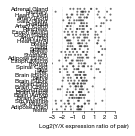

In [15]:
fig, ax = plt.subplots(figsize=(1.5, 2))
fig.subplots_adjust(left=0.34, right=0.926, bottom=0.182, top=0.9)

_res = res13.loc[~res13['pair'].isin(('PCDH11Y/PCDH11X', 'TBL1Y/TBL1X', 'TMSB4Y/TMSB4X'))]

# order by mean
t_order = _res.groupby('tissue').mean()['log2(Y/X ratio)'].sort_values(ascending=False).index

_res.loc[_res['log2(Y/X ratio)'] < -3, 'log2(Y/X ratio)'] = -3
_res.loc[_res['log2(Y/X ratio)'] > 3, 'log2(Y/X ratio)'] = 3

ax = sns.stripplot(x='log2(Y/X ratio)', y='tissue', data=_res, ax=ax, jitter=False,
                   order=t_order, color='0.2', alpha=0.7, s=2)

ax.set_xlim([-3, 3])
ax.set_xticks(np.arange(-3, 4))
ax.set_xlabel('Log2(Y/X expression ratio of pair)')

ax = pf.format_spines(ax)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False)
ax.grid(True, axis='x', ls=':', color='0.76', lw=0.5)
ax = pf.simplify_tissues(ax, axis='y')
ax = pf.format_axis_labels(ax, ticklabsize=6, labsize=6)
ax.set_ylabel('')

fig.savefig("{}/yxratios_stripplot.by_tissue.unlabeled.pdf".format(outdir))

### _RPS4X_ vs. _RPS4Y1_

Plot some values for *RPS4X* and *RPS4Y* in Skeletal Muscle to show what ratios look like on a sample-to-sample basis

In [16]:
meta_ = meta.set_index('SAMPID')

In [17]:
dt = data.loc[:, meta_.loc[data.columns, 'TISSUE']=='Skeletal Muscle']
dt = general.housekeeping_normalize(dt)

dt.index.name = 'gene'

drps = pd.DataFrame({'RPS4X_TPM':dt.loc['RPS4X'], 'RPS4Y1_TPM':dt.loc['RPS4Y1']})
drps['Donor'] = meta_.loc[drps.index, 'SUBJID']
drps = drps.sort_values('Donor')
drps.head()

,RPS4X_TPM,RPS4Y1_TPM,Donor
GTEX-111CU-2026-SM-5GZZC,400.382022,152.263427,GTEX-111CU
GTEX-111FC-0326-SM-5GZZ1,426.590697,190.512557,GTEX-111FC
GTEX-111VG-2626-SM-5GZY2,490.203932,187.561251,GTEX-111VG
GTEX-111YS-2326-SM-5987L,472.136482,169.563261,GTEX-111YS
GTEX-117XS-2526-SM-5H11G,544.304546,208.681127,GTEX-117XS


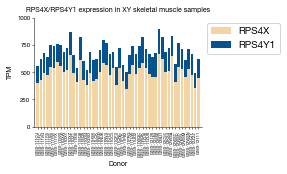

In [18]:
n_donors = 50

xs = np.arange(n_donors)
height_x = drps.iloc[:n_donors]['RPS4X_TPM']
height_y = drps.iloc[:n_donors]['RPS4Y1_TPM']

fig, ax = plt.subplots(figsize=(3, 2))

ax.bar(xs, height_x, edgecolor='none', facecolor='#f3d5a5', label='RPS4X')
ax.bar(xs, height_y, bottom=height_x, edgecolor='none', facecolor='#045390', 
       label='RPS4Y1')
ax.set_ylabel('TPM')
ax.set_xlabel('Donor')
ax.set_xticks(xs)
ax.set_xticklabels(drps.iloc[:n_donors]['Donor'], rotation='vertical', size=4)
ax.set_xlim([-1, n_donors])
ax.set_ylim([0, 1000])
ax.set_yticks([0, 250, 500, 750, 1000])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax = pf.format_spines(ax)
ax.set_title("RPS4X/RPS4Y1 expression in XY skeletal muscle samples")

ax = pf.format_axis_labels(ax, xtlabsize=4)
fig.savefig("{}/RPS4X_RPS4Y1_skeletal_muscle_50donors.pdf".format(outdir))

### HPA Replication

In [19]:
hdata = ds.get_hpa_data(males_only=True)
hmeta = ds.get_metadata('hpa')
hmeta_ = hmeta.set_index('SAMPID')

hdata.head()

,heart_6a,spleen_3b,testis_7e,smallintestine_4d,duodenum_4c,smallintestine_4b,lymphnode_4a,testis_7a,rectum_8d,stomach_3b,...,brain_3c,esophagus_5b,brain_a,pancreas_6b,liver_c,colon_a,gallbladder_5b,gallbladder_5a,colon_d,colon_8b
A1BG,0.669441,4.236174,0.406098,0.353648,0.945126,0.380465,2.339395,0.263517,0.346150,3.206997,...,1.535440,0.371705,2.794862,0.247432,843.449563,1.303124,0.237803,0.963908,0.878944,0.231189
A1CF,0.000000,0.046399,0.057793,32.334047,26.598769,45.127459,0.169834,0.147295,17.534559,1.013590,...,0.047672,0.028914,0.114755,0.851264,117.817294,27.141782,12.907205,8.318549,25.414759,14.363907
A2M,196.078576,334.906824,65.595538,250.676401,190.620418,196.095008,155.725426,108.052707,252.367786,169.567828,...,287.038749,416.009057,169.087878,22.100990,566.894290,361.054013,662.569978,829.469500,166.756257,321.614256
A2ML1,0.092359,0.089609,5.540527,0.030712,0.000000,0.036781,0.019793,10.050612,0.011680,0.040564,...,1.272223,290.818858,3.044786,0.007927,0.054871,0.000000,0.372032,0.133250,0.023383,0.024750
A3GALT2,0.000000,0.172178,1.206003,0.000000,0.000000,0.000000,0.108089,0.612067,0.048796,0.000000,...,0.573959,0.072688,0.140908,0.000000,0.000000,0.000000,0.176705,0.088174,0.081135,0.050524


In [20]:
tissues = ['Testis', 'Prostate', 'Colon - Transverse']

# subset data to just relevant tissues
_gdata = data.loc[:, meta_.loc[data.columns, 'TISSUE'].isin(tissues)]
_hdata = hdata.loc[:, hmeta_.loc[hdata.columns, 'TISSUE'].isin(tissues)]

hratio = yr.calc_ratios(_hdata)
gratio = yr.calc_ratios(_gdata)

# remove any pairs with all null values
okpairs = hratio.notnull().any(axis=1) & gratio.notnull().any(axis=1)
hratio = hratio.loc[okpairs]
gratio = gratio.loc[okpairs]

Loop through tissues and plot

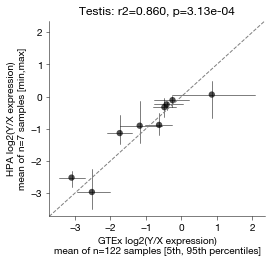

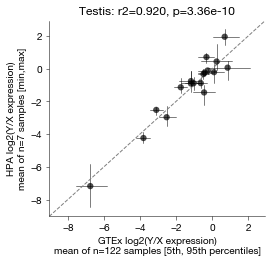

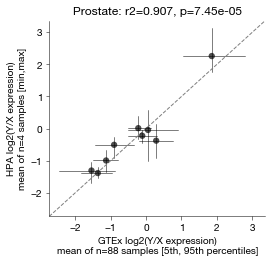

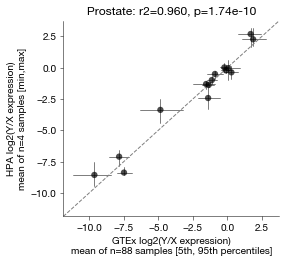

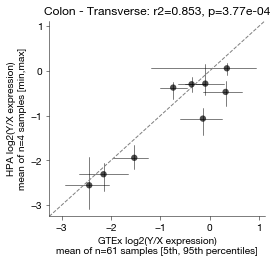

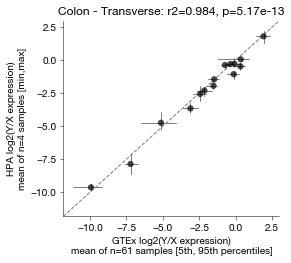

In [21]:
for t in tissues:
    for b in ('broad_only', 'all_pairs'):
        fig, ax = yr.compare_gtex_hpa_yxratios(gratio, hratio, meta, hmeta, t,
                                               show_gtex_ci=True, show_hpa_points=True,
                                               broad_only=(b=='broad_only'))
        t_ = t.split(' ')[0]
        fig.savefig("{0}/hpa_vs_gtex_yxratio.{1}.{2}.pdf".format(outdir, t_, b))